# パーセプトロンとは
***

>ローゼンブラットというアメリカの研究者によって1957年に考案されたアルゴリズムであり、ニューラルネットワークの起源となるアルゴリズムでもある。


**パーセプトロン**は複数の信号を入力として受け取り、ひとつの信号を出力する。そこで、パーセプトロンの信号は「流す/流さない(1/0)」の2値である。  

<img src="./pic/ch1/perceptron.png" width="300">

　出力方法は入力に重みを掛け合わせた値の総和にバイアスを加えたものが閾値を超えた場合に1をそうでなければ0を出力する。これにより1が出力されることを「ニューロンが発火する」と表現され、バイアスは言ってしまえば発火のしやすさであり-θとも表すことができる。また、重みとは各信号の重要性をコントロールするパラメータであり、人口ニューロンの結合強度ともいえる。  
※ここで言うパーセプトロンは正確には人口ニューロン,単純パーセプトロンと呼ばれるものである

**ニューロン**:脳の神経細胞のこと パーセプトロンやニューラルネットワークで結合される各ノードのことでもある 


 実際に上のパーセプトロンによって出力を求める式は式1の通りである。

$$
    \tag{1}
    y = \begin{cases}
    0 & (b + w_1x_1 + w_2x_2 \le 0) \\
    1 & (b + w_1x_1 + w_2x_2 > 0)
    \end{cases}
$$

　**活性化関数(activation function)**は入力信号の総和がどのように活性化(発火)するかを決定する役割がある。式1を活性化関数によって表現すると
 
$$
    \tag{2}
    y = h(b + w_1x_1 + w_2x_2)
$$

$$
    \tag{3}
    h(x) = \begin{cases}
    0 & (x \le 0) \\
    1 & (x > 0)
    \end{cases}
$$

と表現される。式2は、入力信号の総和がh(x)という活性化関数によって変換され、その変換された値が出力yになるということを表している。また、式3で表されるh(x)では、入力が0を超えたら1を、そうでなければ0を返す。

　上記のように、閾値を境にして出力が切り替わる関数を「**ステップ関数**」もしくは「**階段関数**」と呼び、**非連続な関数**である。つまり、パーセプトロンでは活性化関数にステップ関数を利用している。
 
また、式1から分かるように単層パーセプトロンではAND,ORゲートのような線形領域を表現することができるがXORゲートのような非線形領域を表現することはできない。これを可能にするためにはパーセプトロンを多層構造にする必要がある。具体的には、AND,NAND,ORゲートを組み合わせてできるXORゲートを想像するといいだろう。

***

# ニューラルネットワークとは
***

>脳神経を模範とした数学モデルであり、ネットワークを形成する多数の人口ニューロンのシナプス結合強度を変化させることにより問題解決を行う
>引用元:https://www.slideshare.net/yutakakatayama5/ss-203767910

<img src="./pic/ch1/neuralnetwork.png" width="400">

　ニューラルネットワークは上図のように入力層、中間層(もしくは隠れ層)、出力層からなっている。上図のような例は全部で3層から構成されているが、重みを持つ層は実質2層であるため。「2層ネットワーク」と呼ぶ。(3層ネットワークと呼ぶ場合もある)

パーセプトロンでは活性化関数にステップ関数を用いていたが、ニューラルネットワークでよく用いられる活性化関数の一つは、式4で表される「**シグモイド関数**」である。

$$
    \tag{4}
    h(x) = 
    \frac{1}{1 + \exp{(-x)}}
$$

　ステップ関数は非連続であることに対し、シグモイド関数は連続関数である。しかし、下に示すようにグラフで表してみると概形はおよそ似ていると言えるだろう。また、ステップ関数とシグモイド関数はどちらも**非線形関数である**という共通点もある。ニューラルネットワークでは、活性化関数に非線形関数を用いらなければならない。なぜなら、線形関数を用いるとニューラルネットワークで層を深くすることの意味がなくなってしまうからである。複数の層に分けて活性化関数に線形関数を用いたとしても、たった一層に集約できるため中間層の必要がなくなってしまう。つまり、層を重ねることの恩恵を得るためには、活性化関数に非線形関数を用いる必要があるのだ。
 
　また、出力層では活性化関数に「**恒等関数**」を用いる。これは、入力をそのまま出力する関数である。隠れ層の活性化関数をh()と表すのに対し、出力層の活性化関数はσ()で表す。(出力層で利用する活性化関数は、解く問題の性質に応じて決める。例として、回帰問題では恒等関数、2クラス分類問題ではシグモイド関数、多クラス分類では**ソフトマックス関数**を使うのが一般的である)
 
　ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。(ただし、前述の通り問題の種類によって活性化関数を使い分ける必要がある)
 
**分類問題**:人の写った画像から、その人が男性か女性のどちらであるかを分類するような問題  
**回帰問題**:ある入力データから、(連続的な)数値の予測を行うような問題

**恒等関数**:入力をそのまま出力  
**ソフトマックス関数**:以下の式で表される  

$$
    \tag{5}
    y_k = \frac{exp(a_k)}{\sum^{n}_{i=1}(a_i)}
$$

ここでは、出力層がn個あるとして、k番目の出力$ y_k $を求める計算式を表している。式5に示したように、ソフトマックス関数の分子は入力信号$ a_k $の指数関数、分母はすべての入力信号の指数関数の和から構成される。つまり、出力の各ニューロンがすべての入力信号から影響を受けるようになっている。

ソフトマックス関数を実装する際には、オーバーフローに注意しなければならない。非常に大きな値になりがちなので、その値同士で割算を行うと、数値が不安定な結果となってしまう。その提案策として、分子と分母に同じ値のCという任意の定数を掛けるというものがある。分母と分子に同じ値を掛けるため最終的な結果は変わらない。具体的な式を下に示す。

$$
    \tag{6}
    \begin{eqnarray}
    y_k = \frac{exp(a_k)}{\sum^{n}_{i=1}(a_i)}
        &=& \frac{C exp(a_k)}{C \sum^{n}_{i=1}(a_i)} \\
        &=& \frac{exp(a_k + logC)}{\sum^{n}_{i=1}(a_i + logC)} \\
        &=& \frac{exp(a_k + C')}{\sum^{n}_{i=1}(a_i + C')}
    \end{eqnarray}
$$

式6で述べていることは、ソフトマックス関数の計算を行う際には、何らかの定数を足し引きしても結果は変わらないということだ。ここで、C'にはどのような値を用いてもよいが、入力信号の最大値を用いることが一般的である。

ソフトマックス関数の出力は0から1.0の間の実数となる。また、ソフトマックス関数の出力の総和は1となる、つまり、この性質のおかげでソフトマックス関数の出力を**確率**として解釈することができる。よって、ソフトマックス関数を用いることで、問題に対して確率的あるいは統計的な対応ができる。  
　ここで注意しなければならないのは、ソフトマックス関数を用いても各要素の大小関係は変わらないという点だ。これは、指数関数が単調増加するという性質に起因しており、そのため各入力信号ごとに大小関係を調整することは出来ないのである。  
 
　ニューラルネットワークのクラス分類では、一般的に出力の一番大きいニューロンに相当するクラスだけを認識結果とする。そのため、ニューラルネットワークが分類を行う際には、出(確率の表示などをせず、分類のみを行うのであれば)力層のソフトマックス関数を省略することができる。実際の問題では、どうしても計算量が多くなりがちなソフトマックス関数を省略するのが一般的である。
 
　出力層のニューロンの数は、解くべき問題に応じて適宜決める必要がある。クラス分類を行う問題では、出力層のニューロンの数は分類したいクラスの数に設定するのは一般的である。
 
損失関数  
回帰問題: 平均二乗誤差など  
分類問題: 交差エントロピー


# ニューラルネットワークの流れ
***

## 基本的な流れ

ここでは簡単なモデルを元にニューラルネットワークでの学習の流れを確認する。今回用いるモデルは以下とする。また、結合の種類は全結合(アフィン)とする。

<img src="./pic/neural_network.png" width="400">

### ①入力から各ノードごとに数値を算出する(線形変換)
このフェーズでは、入力ベクトルを$ h_0 $とした時に、重み行列$ W_{xy} $とバイアスベクトル$ b_1 $によって以下のような線形変換を行う。

$$
    \tag{1}
    u_1 = W_{xy}h_0 + b_1
$$

式1を元に、モデルに値を割り振って計算してみる。  
図は以下の通りである。

<img src="./pic/neural_network2.png" width="400">

図からも分かるように、ニューラルネットワークでは式1のような線形変換が行われていることが分かる。これをより具体的に式で表すと、

$$
    \tag{2}
    \begin{eqnarray}
    u_{11} &=& w_{11}h_{01} + w_{12}h_{02} + w_{13}h_{03} + b_1 \\
    u_{12} &=& w_{21}h_{01} + w_{22}h_{02} + w_{23}h_{03} + b_2 \\
    \end{eqnarray}
$$

また、式2を式1と等価にするには、

$$
    \begin{eqnarray}
    h_0 &=& 
        \left[ \begin{matrix}
        h_{01} \\
        h_{02} \\
        h_{03}
    \end{matrix} \right] \tag{3} \\
    w_{10} &=& 
        \left[ \begin{matrix}
        w_{11} & w_{12} & w_{13} \\
        w_{21} & w_{22} & w_{23}
        \end{matrix} \right] \tag{4} \\
    b_1 &=& 
        \left[ \begin{matrix}
        b_{1} \\
        b_{2} 
        \end{matrix} \right] \tag{5} \\
    u_1 &=& 
        \left[ \begin{matrix}
        u_{11} \\
        u_{12} 
        \end{matrix} \right] \tag{6}
    \end{eqnarray}
$$

とすることで証明できるだろう。

### ②活性化関数によって算出値を変換する(非線形変換)
フェーズ1では入力ベクトル、シナプス結合強度(結合重み)、バイアスを用いて出力ベクトル$ u $を導き出した。このフェーズでは、前フェーズで導き出した出力を非線形変換を行い線形では表現できない非線形な集合の分類を行う。簡単な例としてはXORゲートの表現などが挙げられるだろう。ORゲートANDゲートはそれぞれ線形な関数で表現可能だが、XORゲートはこれらを組み合わせて表現される。ニューラルネットワークも同じように非線形な変換を繰り返して、多クラスの分類のような分類問題や売上予測のような回帰問題を解決などを行う。

ここで非線形変換に用いる関数を**活性化関数**という。活性化関数にはいくつかの種類がある。また、活性化関数を$ a() $と表し、その出力結果を$ h $とすると

$$
    \tag{7}
    h_{xy} = a(u_{xy})
$$

というように表される。ここで、$ h $は活性値と呼ばれ、次に層が続いているのであればその層への入力となる。

<img src="./pic/neural_network3.png" width="400">

### ③1と2を中間層の数だけ行い最終的な値を算出する
1. 

# 実際にニューラルネットワークを構築・学習してみる
***

本項目では、実際にデータを使用しニューラルネットワークの構築および学習を行っていく。その中で以下のような目標を立てた。

1. 実際にニューラルネットワークを構築する
1. トレーニングデータとテストデータを作成する
1. 実施する問題に応じた損失関数や目的関数を吟味する
1. フィッティングを行い、層の数や結合について吟味し、最適化を行う(できるだけ)

では、以降で実際にこれらのプログラムを作成していく。今回実際に解決を行う問題としては「ゲームの売り上げからの新規ゲーム評価」について行っていく。問題の種類としては、回帰問題となるため活性化関数は恒等関数(入力をそのまま返す|$ y = x $)を用いる。また、損失関数には平均二乗誤差を用いオプティマイザには確率的勾配降下法を、評価関数には平均絶対誤差を用いていく。

https://www.tensorflow.org/tutorials/keras/regression?hl=ja

In [3]:
# データの準備
import pandas as pd

df = pd.read_csv("./Datasets/vgsales.csv")
print(df)

del df["Rank"]
del df["Name"]
del df["Year"]
del df["Genre"]
del df["Publisher"]
del df["Platform"]
print(df)
#df["Genre"] = df["Genre"].astype(str)
#df["Publisher"] = df["Publisher"].astype(str)

#カテゴリをワンホットエンコーディングでダミー変数に変換
df = pd.get_dummies(df)
print(df.isna().sum())
# 欠損値を除外
df = df.dropna(how="any")

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
print(train_dataset.shape,test_dataset.shape)

train_stats = train_dataset.describe()
train_stats.pop("Global_Sales")
train_stats = train_stats.transpose()

print(train_stats)

train_labels = train_dataset.pop('Global_Sales')
test_labels = test_dataset.pop('Global_Sales')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

In [84]:
# データの準備
import pandas as pd

df = pd.read_csv("./Datasets/bmw.csv")

del df["model"]

print(df)

#カテゴリをワンホットエンコーディングでダミー変数に変換
df = pd.get_dummies(df)
print("NaNの有無(カテゴリ最大値を出力):",df.isna().sum().max())
# 欠損値を除外
df = df.dropna(how="any")

#print(df)

train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()

print(train_stats)

train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

       year  price transmission  mileage fuelType  tax   mpg  engineSize
0      2014  11200    Automatic    67068   Diesel  125  57.6         2.0
1      2018  27000    Automatic    14827   Petrol  145  42.8         2.0
2      2016  16000    Automatic    62794   Diesel  160  51.4         3.0
3      2017  12750    Automatic    26676   Diesel  145  72.4         1.5
4      2014  14500    Automatic    39554   Diesel  160  50.4         3.0
...     ...    ...          ...      ...      ...  ...   ...         ...
10776  2016  19000    Automatic    40818   Diesel  150  54.3         2.0
10777  2016  14600    Automatic    42947   Diesel  125  60.1         2.0
10778  2017  13100       Manual    25468   Petrol  200  42.8         2.0
10779  2014   9930    Automatic    45000   Diesel   30  64.2         2.0
10780  2017  15981    Automatic    59432   Diesel  125  57.6         2.0

[10781 rows x 8 columns]
NaNの有無(カテゴリ最大値を出力): 0
                         count          mean           std     min     25%  

In [52]:
# ニューラルネットワークを構築
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

normed_train_data.drop(1)
N=normed_train_data.shape[1]

def regressionModel():
    model = keras.Sequential()
    model.add(Dense(64, activation='relu', input_dim = N))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    #モデルのコンパイル(mse:平均二乗誤差, sgd:確率的勾配降下法, mae:平均絶対誤差)
    model.compile(loss="mse", optimizer="rmsprop",metrics=["mae","mse"])
    model.summary()

    return model

model = regressionModel()

# 学習データのうち２割を検証用に使う(validation_split)
history = model.fit(normed_train_data ,train_labels, validation_split = 0.2, epochs=100, batch_size=32,verbose=0)
score = model.evaluate(normed_test_data, test_labels, batch_size=1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
2156/2156 [==============================] - 1s 675us/step - loss: 18404088.0000 - mae: 2863.5183 - mse: 18404088.0000


In [53]:
# Historyオブジェクトの中身(history.history)を確認する
# https://keras.io/ja/visualization/
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,20988194.0,2813.377686,20988194.0,20049108.0,2805.909912,20049108.0,95
96,20955594.0,2813.816162,20955594.0,19940570.0,2781.704102,19940570.0,96
97,20919054.0,2810.656006,20919054.0,19938740.0,2790.998535,19938740.0,97
98,20891348.0,2812.150635,20891348.0,19868070.0,2771.839355,19868070.0,98
99,20833210.0,2806.611328,20833210.0,19883002.0,2754.713379,19883002.0,99


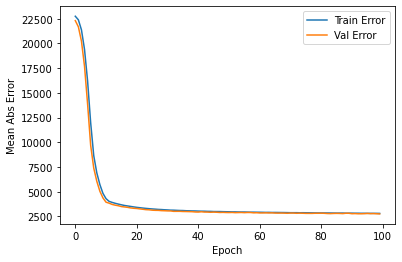

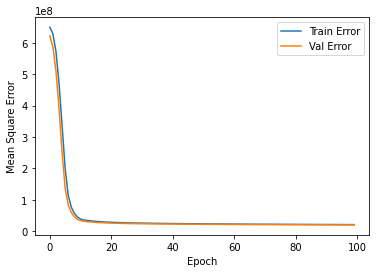

In [76]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # 平均絶対誤差
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()

    # 平均二乗誤差
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.show()


plot_history(history)

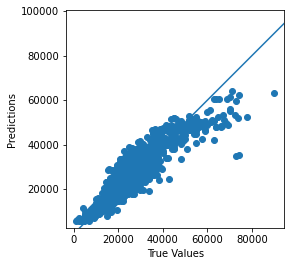

In [79]:
# モデルを使った予測
test_predictions = model.predict(normed_test_data).flatten()

# 誤差を図示する
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')  #アスペクト比を1:1に
plt.axis('square') #正方形のプロット
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000]) #直線表示

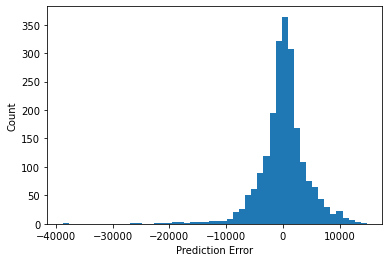

In [62]:
# モデルを使った予測(誤差の分布)
error = test_predictions - test_labels #誤差 = 予測値 - 正解(ラベル)
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

# 実際にニューラルネットワークを構築してみるその2
***
前章では回帰問題を実際にニューラルネットワークを構築して解いた。しかし、回帰問題とは目的関数が線形(線形回帰のため)になり、多層のネットワークを構築するという利点を生かしきれないという問題もあった。(入力次元数が多くなるごとに、重回帰分析では求めるパラメータが多くなるため、完全に無意味というわけではない。←疑似逆行列を求めて手計算で一気に求めるという手法もある)そこで、今回は**多クラス分類**の問題を実際にニューラルネットワークを構築して学習させることで、パーセプトロンを多層にすることの意義や実際の順伝播・逆伝播の計算についてより理解を深めるという目的を順に達成していこうと思う。

今回用いるデータセットは以下の通りである。

名前:Students' Academic Performance Dataset (xAPI-Edu-Data.csv)  
入力次元数: 16  
データ数: 480  
参考元リンク:https://www.kaggle.com/aljarah/xAPI-Edu-Data  

copyrights:  
Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.

In [2]:
import pandas as pd

df = pd.read_csv("./Datasets/xAPI-Edu-Data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [3]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


| # |   Column                   | Non-Null Count |  Dtype | type | mean |
|:-:|:--------------------------:|:--------------:|:------:|:----:|:----:|
| 0 |  gender                    |  480 non-null  | object | Male,Female | 学生の性別 |
| 1 |  NationalITy               |  480 non-null  | object | Kuwait, Lebanon, Egypt, SaudiArabia,<br>USA, Jordan,Venezuela, Iran,<br>Tunis, Morocco, Syria, Palestine, Iraq, Lybia | 学生の国籍 |
| 2 |  PlaceofBirth              |  480 non-null  | object | Kuwait, Lebanon, Egypt, SaudiArabia,<br>USA, Jordan,Venezuela, Iran,<br>Tunis, Morocco, Syria, Palestine, Iraq, Lybia | 学生の出生地 |
| 3 |  StageID                   |  480 non-null  | object | lowerlevel,MiddleSchool,HighSchool 教育段階 |
| 4 |  GradeID                   |  480 non-null  | object | G-01 to G-12 | 学年 |
| 5 |  SectionID                 |  480 non-null  | object | A, B, C | 教室 |
| 6 |  Topic                     |  480 non-null  | object | English, Spanish, French, Arabic, IT,Math,<br>Chemistry, Biology,Science, History, Quran, Geology | 科目 |
| 7 |  Semester                  |  480 non-null  | object | First, Second | 学期 |
| 8 |  Relation                  |  480 non-null  | object | mom, father | 担当した親 |
| 9 |  raisedhands               |  480 non-null  | int64  | 0-100 | 挙手した回数 |
| 10|  VisITedResources          |  480 non-null  | int64  | 0-100 | アクセスした回数 |
| 11|  AnnouncementsView         |  480 non-null  | int64  | 0-100 | アナウンスのチェック回数 |
| 12|  Discussion                |  480 non-null  | int64  | 0-100 | discussion参加回数 |
| 13|  ParentAnsweringSurvey     |  480 non-null  | object | Yes, No | 親が調査に回答したか |
| 14|  ParentschoolSatisfaction  |  480 non-null  | object | Good, Bad | 親が満足したか |
| 15|  StudentAbsenceDays        |  480 non-null  | object | above-7, under-7 | 欠席日数 |
| 16|  Class                     |  480 non-null  | object | Low-Level, Middle-Level, High-Level | 子供の該当するグレード |

※ 16番のClassが正解ラベルとなる。また、割り当てについては下記の通りである。  

><span style="font-size: 150%; color: black;">The students are classified into three numerical intervals based on their total grade/mark:  </span><br>
Low-Level: interval includes values from 0 to 69,  
Middle-Level: interval includes values from 70 to 89,  
High-Level: interval includes values from 90-100.

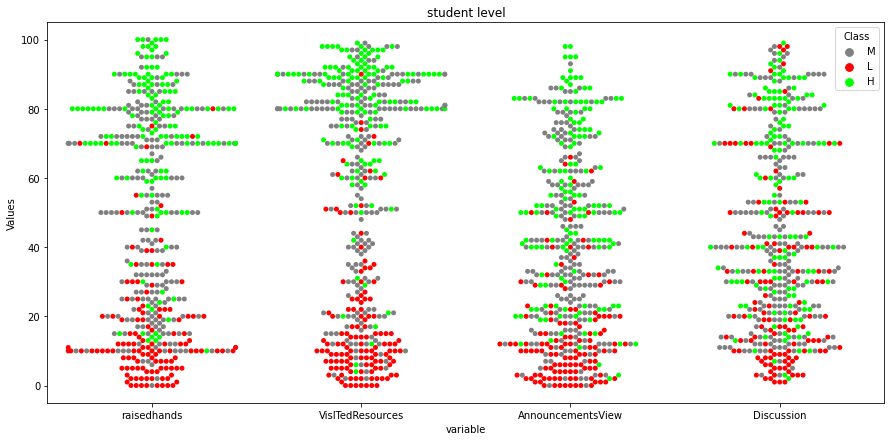

     Class     variable  value
0        M  raisedhands     15
1        M  raisedhands     20
2        L  raisedhands     10
3        L  raisedhands     30
4        M  raisedhands     40
...    ...          ...    ...
1915     L   Discussion      8
1916     M   Discussion     28
1917     M   Discussion     29
1918     L   Discussion     57
1919     L   Discussion     62

[1920 rows x 3 columns]


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

melt = pd.melt(df,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView',"Discussion"])
plt.figure(figsize=(15, 7))
sns.swarmplot(x='variable',y='value',hue='Class' , data=melt ,palette={'H':'lime','M':'grey','L':'red'})
plt.ylabel("Values")
plt.title("student level")

plt.show()
print(melt)

## カテゴリー値の数値化
学習を行う際、計算はすべて数値をもとにしているため、入力データにカテゴリー値(文字列)を含むと学習できない。そのため、ワンホットエンコーディングを行う必要がある。今まではワンホットエンコーディングにpandas.get_dummies()を用いてきたが、numpyに「条件に応じた処理を行う」whereというものがあったためこちらを用いて行ってみる。

In [5]:
#複数回実行すると値が全て0になるため、状態記憶用の変数stateを用意
state = 1

In [6]:
if state == 1:
    print(df["StudentAbsenceDays"])
    df["StudentAbsenceDays"] = np.where(df["StudentAbsenceDays"] == "Above-7", 1, 0)
    state += 1

print("教科ごとの欠席比較:\n",df["StudentAbsenceDays"].groupby(df['Topic']).mean())

0      Under-7
1      Under-7
2      Above-7
3      Above-7
4      Above-7
        ...   
475    Above-7
476    Under-7
477    Under-7
478    Above-7
479    Above-7
Name: StudentAbsenceDays, Length: 480, dtype: object
教科ごとの欠席比較:
 Topic
Arabic       0.389831
Biology      0.266667
Chemistry    0.500000
English      0.422222
French       0.323077
Geology      0.250000
History      0.473684
IT           0.473684
Math         0.476190
Quran        0.318182
Science      0.450980
Spanish      0.320000
Name: StudentAbsenceDays, dtype: float64


In [7]:
if state == 2:
    print(df["gender"])
    df["gender"] = np.where(df["gender"] == "M", 1, 0)
    state += 1

print("教科ごとの男女比較:\n",df["gender"].groupby(df['Topic']).mean())

0      M
1      M
2      M
3      M
4      M
      ..
475    F
476    F
477    F
478    F
479    F
Name: gender, Length: 480, dtype: object
教科ごとの男女比較:
 Topic
Arabic       0.728814
Biology      0.666667
Chemistry    0.500000
English      0.577778
French       0.538462
Geology      0.583333
History      0.578947
IT           0.663158
Math         0.761905
Quran        0.590909
Science      0.549020
Spanish      0.960000
Name: gender, dtype: float64


In [14]:
if state == 3:
    #print(df["Semester"])
    df["Semester"] = np.where(df["Semester"] == "F", 1, 2)
    state += 1
    
if state == 4:
    #print(df["Relation"])
    df["Relation"] = np.where(df["Relation"] == "Father", 1, 0)
    state += 1
    
if state == 5:
    #print(df["ParentAnsweringSurvey"])
    df["ParentAnsweringSurvey"] = np.where(df["ParentAnsweringSurvey"] == "Yes", 1, 0)
    state += 1

if state == 6:
    #print(df["ParentschoolSatisfaction"])
    df["ParentschoolSatisfaction"] = np.where(df["ParentschoolSatisfaction"] == "Good", 1, 0)
    state += 1

if state == 7:
    try:
        df['Class'].loc[df['Class'] == 'L'] = 0.0
        df['Class'].loc[df['Class'] == 'M'] = 1.0
        df['Class'].loc[df['Class'] == 'H'] = 2.0
        state += 1
        df = df.astype({"Class":int})
    except SettingWithCopyWarning:
        state -= 1

C:\Users\zhang_lab\anaconda3\envs\opencv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# one-hot エンコーディングの意義と注意点

ここでは、カテゴリ値を順伝播計算に用いるための数値に変換する**one-hotエンコーディング**について概要とそのやり方、注意点について所感を交え記していく。まずone-hotエンコーディングの定義は以下の通りだ。
>one-hotエンコーディングはしばしば状態機械の状態を表すのに用いられる。二進法やグレイコードを使うときにはその状態を決定するためにデコードが必要だが、one-hotを使うときには不要である。というのも、one-hotではビット列のn番目のビットがHighであればn番目の状態を表していることになるからである。
><cite>https://ja.wikipedia.org/wiki/One-hot</cite>

上の例ではよくわからないだろう。では、実際の例を参考により具体的に記していこう。

| No. | 性別 | 科目 |
|:---:|:----:|:----:|
|  1  |  男  | 数学 |
|  2  |  女  | 科学 |
|  3  |  女  | 数学 |
|  4  |  男  | 地理 |

上のような例で考えてみよう。列:性別には男と女という2つのカテゴリが存在し、列:科目には数学,科学,地理という3つのカテゴリが存在する。ここであえて言うまでもないとは思うが、それぞれの値は文字列型であるため数値計算に用いることは不可能である。では、このような場合にどのような処理をすればよいか。これには２つの手法が考えられる。

1. 0もしくは1の値に入れ替える
2. 対象の列をカテゴリの状態列へと変換する

以上がone-hotエンコーディングを行う際に考えられる手法だ。では、どのように使い分けるか。それは非常に単純である。  
**カテゴリが２種類であれば1つ目**を**それ以上であれば2つ目**を用いればよい。  
つまり、列:性別は現状男か女の２種類しかないため男であれば1,女であれば0もしくはその逆の値へと変換してやればよい。実際に上の例を男であるならば特徴量は1,女であれば特徴量は0というように変換してみると,

| No. | 性別 | 科目 |
|:---:|:----:|:----:|
|  1  |   1  | 数学 |
|  2  |   0  | 科学 |
|  3  |   0  | 数学 |
|  4  |   1  | 地理 |

このように変換できるだろう。これが先の引用にあった状態機械の状態を指すものだ。厳密にいえば性別を状態と呼ぶのはいささか違和感を感じるが、2つの状態(カテゴリ)のうちのどちらかという認識をしようということで茶を濁しておく。また、付け加えると「one-hotではビット列のn番目のビットがHighであればn番目の状態を表していることになる」とあるが、、これを上の例で言語するのであれば、「No 番目の性別がHigh(1)であれば No 番目の人物の性別は男であることを表していることになる」という風に言えるだろう。  
　では、少々長くなってしまったが、2つ目の手法について実例をあげていこう。列:科目は3つの種類があるのだから、2番目の手法を用いるのが妥当だろう。上の説明では「カテゴリの状態列へと変換?」と感じただろう。正直適切な説明が思い浮かばなかったという本音があるが、先の状態機械(0か1かで表す)ということを踏まえると、ただ1列で3つの状態を表すことは不可能だ。そこで、以下のように変換することでその問題を解決する。

| No. | 性別 | 数学 | 科学 | 地理 |
|:---:|:----:|:----:|:----:|:----:|
|  1  |   1  |   1  |   0  |   0  |
|  2  |   0  |   0  |   1  |   0  |
|  3  |   0  |   1  |   0  |   0  |
|  4  |   1  |   0  |   0  |   1  |

お分かり頂けただろうか。つまり、対象列をカテゴリごとの列へと変換し、その状態であるか否かで表すのだ。ここで重要なのは、変換後のデータが**行成分をすべて足すと必ず1になる**ということだ。状態機械が理解できていれば何も違和感は感じないだろうが、そうでない人はもう一度頭を整理してみてほしい。列:科目では**1人につき1科目**であった。つまり、もし変換後の行成分を足して2になったとするのなら、それは1人についき2科目該当するということに他ならない。そのため、2の手法では必ず**変換後の行成分を足すと和は1となる(1+0+,,,+0)**。もう一つ、ここまで説明したら分かってはいると思うが、状態機械なのだから0.5だとか2だとか**0と1以外の値は出てこない**。数学を0.5とるだとか、地理を2人分とるだとか、そんなことはないだろう。というか、今回の場合で言えばその科目を**とった(1)かとってないか(0)**の2択なのだからまあまずありえないとわかっていただけるだろう。

　ここまでone-hotエンコーディングの概要と手法について説明したが、「別に全部2のやり方でよくね？」と思うかもしれない。確かに変換自体はすべて2のやり方でできるが、本来であれば学習を難しくする入力成分は余計に多くなることは避けたい。もちろん、必要な入力成分については多ければ多いほどより適切な解へと辿りつけるだろう。しかし、よく考えてほしいのは、男か女かというのは元は1つの性別というデータであり、そこで入力成分を増やしてところで得られるメリットはデメリットを下回るだろうということだ。重みづけというのは、データ群における特徴量の重要性を数値的に表したものともいえるため、その重要性を比で表せるのであれば無駄に列を増やす必要はないのだ。もしかすると、「入力データが0の時、どんな重みをかけても0になるんだからせっかく重み付けしても状態0の場合意味ないじゃん」と思うかもしれない。しかし、ここで大事なのは1の時のデータ基準として比率を考えるという点だ。

 もう1つ、やりがちなミスとしては、例えばカテゴリ値がG-01,G-02,・・・,G-NNという風にカテゴリ値の中に数値が含まれている場合、値を1,2,・・・,NNという風に変換したくなると思うが、**同じ重みwをかける**という点に注意していただきたい。G-01に所属していた時に発火しやすいということが分かった場合、どんなに頑張っても正の数をかけるとG-NNの特徴量が一番大きくなってしまうのだ。かといって負の数をかけるのは最適とは言えないだろう。one-hotエンコーディングのようにカテゴリ値を数値に変換する際には実際の挙動を予測して慎重に手法を選ぶと良いだろう。

In [17]:
print((df["NationalITy"]!=df["PlaceofBirth"]).sum())
# np.whereを用いるとdtypeも同時に変更される
# そうでない場合(state==9を参照)はastypeによって手動で変更する必要がある
df.info()

232
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    int32  
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    int32  
 8   Relation                  480 non-null    int32  
 9   raisedhands               480 non-null    int64  
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    int32  
 14  Parent

In [11]:
print(df.shape)
df.tail()

(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,0,Jordan,Jordan,1.0,G-08,0.0,Chemistry,2,1,5,4,5,8,0,0,1,0.0
476,0,Jordan,Jordan,1.0,G-08,0.0,Geology,1,1,50,77,14,28,0,0,0,1.0
477,0,Jordan,Jordan,1.0,G-08,0.0,Geology,2,1,55,74,25,29,0,0,0,1.0
478,0,Jordan,Jordan,1.0,G-08,0.0,History,1,1,30,17,14,57,0,0,1,0.0
479,0,Jordan,Jordan,1.0,G-08,0.0,History,2,1,35,14,23,62,0,0,1,0.0


In [23]:
df = pd.get_dummies(df)
print(df2.columns)
df.tail()

Index(['gender', 'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class',
       'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq',
       'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia',
       'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine',
       'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis',
       'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela',
       'StageID_0.0', 'StageID_1.0', 'StageID_2.0', 'GradeID_G-02',
       'GradeID_G-04', 'G

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
475,0,2,1,5,4,5,8,0,0,1,...,1,0,0,0,0,0,0,0,0,0
476,0,1,1,50,77,14,28,0,0,0,...,0,0,0,1,0,0,0,0,0,0
477,0,2,1,55,74,25,29,0,0,0,...,0,0,0,1,0,0,0,0,0,0
478,0,1,1,30,17,14,57,0,0,1,...,0,0,0,0,1,0,0,0,0,0
479,0,2,1,35,14,23,62,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [19]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("Class")
train_stats = train_stats.transpose()

print(train_stats)

train_labels = train_dataset.pop("Class")
test_labels = test_dataset.pop("Class")

                          count       mean        std  min    25%   50%  \
gender                    384.0   0.640625   0.480443  0.0   0.00   1.0   
Semester                  384.0   1.494792   0.500625  1.0   1.00   1.0   
Relation                  384.0   0.593750   0.491773  0.0   0.00   1.0   
raisedhands               384.0  46.908854  30.545853  0.0  15.75  50.0   
VisITedResources          384.0  55.044271  32.751786  0.0  20.00  65.0   
AnnouncementsView         384.0  37.783854  26.726497  0.0  14.75  33.0   
Discussion                384.0  43.703125  28.000474  1.0  20.00  39.0   
ParentAnsweringSurvey     384.0   0.554688   0.497649  0.0   0.00   1.0   
ParentschoolSatisfaction  384.0   0.606771   0.489104  0.0   0.00   1.0   
StudentAbsenceDays        384.0   0.403646   0.491268  0.0   0.00   0.0   
Class                     384.0   1.036458   0.743096  0.0   0.00   1.0   

                            75%    max  
gender                     1.00    1.0  
Semester         

In [26]:
# ネットワークを構築
N = train_dataset.shape[1]

def multi_classing_NN():
    model = keras.Sequential()
    model.add(Dense(64, activation='sigmoid', input_dim = N))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(3))
    
    #モデルのコンパイル(mse:平均二乗誤差, sgd:確率的勾配降下法, mae:平均絶対誤差)
    model.compile(loss="mse", optimizer="rmsprop",metrics=["mae","mse"])
    model.summary()

    return model